## DATASETS & DATALOADERS

### Loading a Dataset
### 加载数据集

Fashin-MNIST数据集，包含60000训练数据样本和10000测试数据样本，每张图片为28 * 28的十分类

使用以下参数加载FashionMNIST 数据集：
- root是存储训练/测试数据的路径，
- train指定训练或测试数据集，
- download=True如果数据不可用，则从 Internet 下载数据root。
- transform并target_transform指定特征和标签转换

In [22]:
import torch
from torch.utils.data import Dataset
from torchvision import datasets
from torchvision.transforms import ToTensor
import matplotlib.pyplot as plt


training_data = datasets.FashionMNIST(
    root="data",
    train=True,
    download=True,
    transform=ToTensor()
)

test_data = datasets.FashionMNIST(
    root="data",
    train=False,
    download=True,
    transform=ToTensor()
)

100.0%


Extracting data\FashionMNIST\raw\train-images-idx3-ubyte.gz to data\FashionMNIST\raw



100.6%


Extracting data\FashionMNIST\raw\train-labels-idx1-ubyte.gz to data\FashionMNIST\raw



100.0%


Extracting data\FashionMNIST\raw\t10k-images-idx3-ubyte.gz to data\FashionMNIST\raw



119.3%

Extracting data\FashionMNIST\raw\t10k-labels-idx1-ubyte.gz to data\FashionMNIST\raw



In [21]:
!pip install matplotlib

  Using cached matplotlib-3.5.2-cp38-cp38-win_amd64.whl (7.2 MB)
  Using cached cycler-0.11.0-py3-none-any.whl (6.4 kB)


### Iterating and Visualizing the Dataset
### 迭代与初始化数据集

像列表一样手动索引Datasets，matplotlib用来可视化训练数据中的一些样本

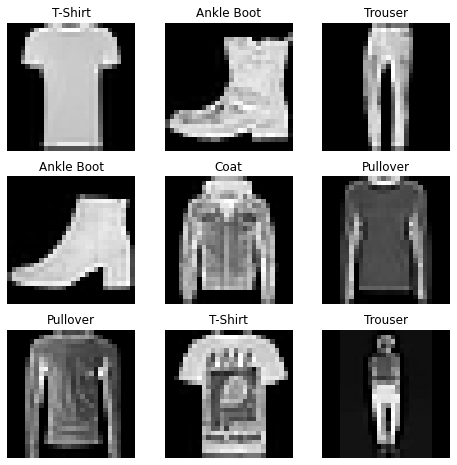

In [23]:
labels_map = {
    0: "T-Shirt",
    1: "Trouser",
    2: "Pullover",
    3: "Dress",
    4: "Coat",
    5: "Sandal",
    6: "Shirt",
    7: "Sneaker",
    8: "Bag",
    9: "Ankle Boot",
}
figure = plt.figure(figsize=(8, 8))
cols, rows = 3, 3
for i in range(1, cols * rows + 1):
    sample_idx = torch.randint(len(training_data), size=(1,)).item()
    img, label = training_data[sample_idx]
    figure.add_subplot(rows, cols, i)
    plt.title(labels_map[label])
    plt.axis("off")
    plt.imshow(img.squeeze(), cmap="gray")
plt.show()

### Creating a Custom Dataset for your files
### 用你的文件创建自定义数据集

In [ ]:
"""
自定义Dataset类必须实现三个函数：
__init__
__len__
__getitem__

FashionMNIST图像存储在一个目录img_dir中，
它们的标签分别存储在一个CSV文件annotations_file中
"""

In [34]:
import os
import pandas as pd
from torchvision.io import read_image

class CustomImageDataset(Dataset):
    def __init__(self, annotations_file, img_dir, transform=None, target_transform=None):
        self.img_labels = pd.read_csv(annotations_file)
        self.img_dir = img_dir
        self.transform = transform
        self.target_transform = target_transform

    def __len__(self):
        return len(self.img_labels)

    def __getitem__(self, idx):
        img_path = os.path.join(self.img_dir, self.img_labels.iloc[idx, 0])
        image = read_image(img_path)
        label = self.img_labels.iloc[idx, 1]
        if self.transform:
            image = self.transform(image)
        if self.target_transform:
            label = self.target_transform(label)
        return image, label

In [ ]:
"""
__init__
__init__ 函数在实例化Dataset对象时运行一次。
初始化包含图像、注释文件和两种转换的目录
"""

In [ ]:
"""
lables.csv

tshirt1.jpg, 0
tshirt2.jpg, 0
......
ankleboot999.jpg, 9
"""

In [ ]:
def __init__(self, annotations_file, img_dir, transform=None, target_transform=None):
    self.img_labels = pd.read_csv(annotations_file)
    self.img_dir = img_dir
    self.transform = transform
    self.target_transform = target_transform

In [ ]:
"""
__len__
__len__ 函数返回我们数据集中的样本数
"""

In [ ]:
def __len__(self):
    return len(self.img_labels)

In [ ]:
"""
__getitem__
__getitem__ 函数从给定索引处的数据集中加载并返回
一个样本idx。基于索引，它识别图像在磁盘上的位置，
使用将其转换为张量read_image，从csv数据中检索相应
的标签self.img_labels，调用它们的变换函数（如果适
用），并返回张量图像和相应的标签一个元组
"""

In [ ]:
def __getitem__(self, idx):
    img_path = os.path.join(self.img_dir, self.img_labels.iloc[idx, 0])
    image = read_image(img_path)
    label = self.img_labels.iloc[idx, 1]
    if self.transform:
        image = self.transform(image)
    if self.target_transform:
        label = self.target_transform(label)
    return image, label

### Preparing your data for training with DataLoaders
### 使用 DataLoaders 为训练准备数据

In [ ]:
"""
检索我们数据集的Dataset特征并一次标记一个样本。
在训练模型时，我们通常希望以“小批量”的形式传
递样本，在每个epoch重新洗牌以减少模型过拟合，
并使用 Pythonmultiprocessing加速数据检索。

DataLoader是一个可迭代的，它在一个简单的API中为
我们抽象了这种复杂性
"""

In [38]:
from torch.utils.data import DataLoader

train_dataloader = DataLoader(training_data, batch_size=64, shuffle=True)
test_dataloader = DataLoader(test_data, batch_size=64, shuffle=True)

### Iterate through the DataLoader
### 遍历DataLoader

In [ ]:
"""
将数据集加载到DataLoader中，并根据需要遍历数据集。
已将该数据集加载到中，DataLoader并且可以根据需要
遍历数据集。下面的每次迭代都会返回一批train_features
和train_labels（分别包含batch_size=64特征和标签）
"""

Feature batch shape: torch.Size([64, 1, 28, 28])
Labels batch shape: torch.Size([64])


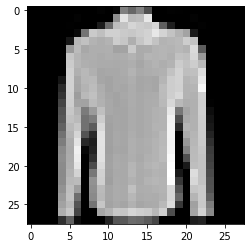

Label: 6


In [39]:
# Display image and label.
train_features, train_labels = next(iter(train_dataloader))
print(f"Feature batch shape: {train_features.size()}")
print(f"Labels batch shape: {train_labels.size()}")
img = train_features[0].squeeze()
label = train_labels[0]
plt.imshow(img, cmap="gray")
plt.show()
print(f"Label: {label}")